# How to Benchmark Optimization Algorithms

Benchmarking optimization algorithms is an important step when developing a new algorithm or when searching for a algorithm that is good at solving a particular problem. 

In general, benchmarking constists of the following steps:

- Defining the test problems (or getting pre-implemented ones)
- Defining the optimization algorithms and the tuning parameters you want to try
- Running the benchmark
- Plotting the results. 

## Get Test Problems

Estimagic includes the problems of [Moré and Wild (2009)](https://epubs.siam.org/doi/pdf/10.1137/080724083) by default.

Each problem consist of the `inputs` (the criterion function and the start parameters) and the `solution` (the optimal parameters and criterion value).

Below we load the Moré and Wild problems and look at one Rosenbrock problem with difficult start parameters.

In [1]:
from estimagic import get_benchmark_problems

problems = get_benchmark_problems("example")

## Specifying the Optimizers

To select optimizers you want to benchmark on the set of problems, you can simply specify them as a list. Advanced examples that do not only compare algorithms but also vary the `algo_options` can be found below. 

In [10]:
optimizers = [
    "scipy_lbfgsb",
    "scipy_neldermead",
    "scipy_truncated_newton",
]

## Running the Benchmark

Once you have your problems and your optimizers, you can simply use `run_benchmark`. The results are a dictionary with one entry for each (problem, algorithm) combination. Each entry not only saves the the solution but also the history of the algorithm's criterion and parameter history. 

In [3]:
from estimagic import run_benchmark

results = run_benchmark(
    problems,
    optimizers,
    logging_directory="benchmark_logs",
)

## Making convergence plots

**Convergence Plots** focus on one Problem and show how fast each optimizer is for that problem. They are similar to what you know from the dashboard. 

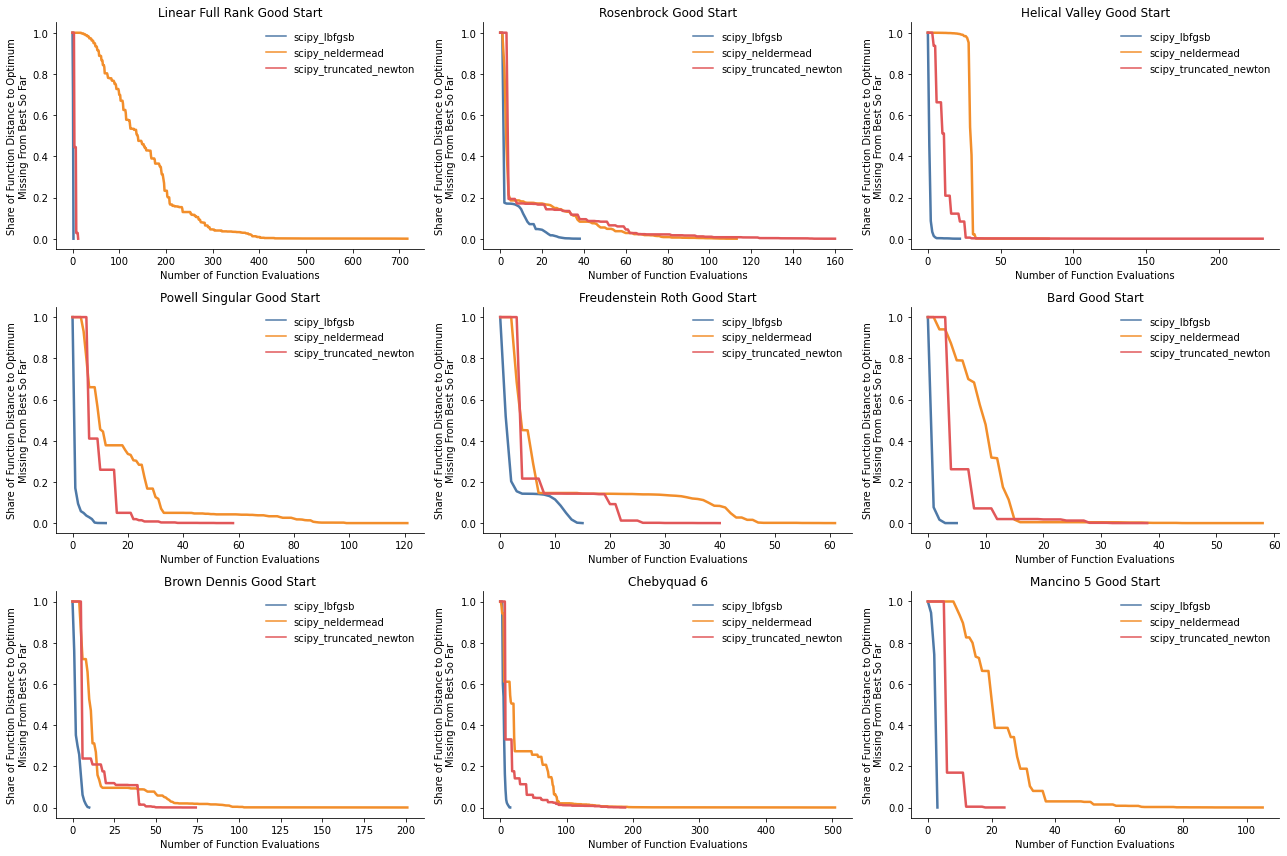

In [4]:
import numpy as np

from estimagic import convergence_plot

fig, axes = convergence_plot(
    problems=problems,
    results=results,
    n_cols=3,
)

## Making profile plots

**Profile Plots** compare optimizers over a whole set of problem set. The literature distinguishes data profiles and performance profiles. Data profiles use a normalized runtime measure whereas performance profile use an absolute one. For background information check [Moré and Wild (2009)](https://epubs.siam.org/doi/pdf/10.1137/080724083). 

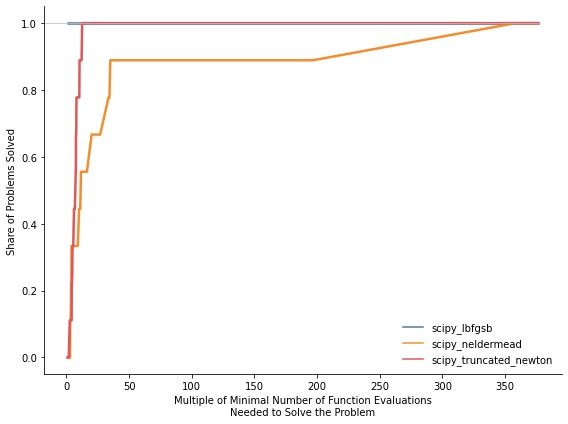

In [7]:
from estimagic import profile_plot

fig, ax = profile_plot(
    problems=problems,
    results=results,
)

In [6]:
from estimagic.benchmarking.process_benchmark_results import create_performance_df

df, converged_info = create_performance_df(
    problems=problems,
    results=results,
    stopping_criterion="y",
    y_precision=1e-3,
    x_precision=None,
)

converged_info  # [~converged_info.all(axis=1)]

algorithm,scipy_lbfgsb,scipy_neldermead,scipy_truncated_newton
problem,,,
bard_good_start,True,True,True
brown_dennis_good_start,True,True,True
chebyquad_6,True,True,True
freudenstein_roth_good_start,True,True,True
helical_valley_good_start,True,True,True
linear_full_rank_good_start,True,True,True
mancino_5_good_start,True,True,True
powell_singular_good_start,True,True,True
rosenbrock_good_start,True,True,True
